In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import csv
import numpy as np
import heapq
from matplotlib import pyplot as plt
import time
from sklearn.manifold import TSNE


word_vec_file = 'vectors_new.txt'

In [2]:
def getWordVectorDict():
    reader = csv.reader(open(word_vec_file), delimiter = ' ')

    word_vector_dict = {}
    for row in reader:
        key = row[0]
        if key in word_vector_dict:
            pass
        word_vector_dict[key] = np.array(row[1:],dtype=float)
    return word_vector_dict

In [3]:
def get_cosine_similarity(v1,v2):
    x = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
    if np.isnan(x):
        x = 0
    return x
    

In [4]:
def find_most_similar(word_dict, word, number_of_results):
    current_word_vector = word_dict[word]
    h = []
    for word in word_dict:
        word_vec = word_dict[word]
        heapq.heappush(h, (-get_cosine_similarity(current_word_vector, word_vec), word))
    return [heapq.heappop(h)[1] for i in range(number_of_results)]

In [5]:

def get_sne_projection_values(word_vectors):
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(word_vectors)

    print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
    return tsne_results
    
def plot_sne_visualization(results, words, render_label = False):
    # plot the result
    vis_x = results[:, 0]
    vis_y = results[:, 1]
    
    x2 = results[0, 0]
    y2 = results[0, 1]
    
    plt.scatter(vis_x, vis_y)
    if render_label:
        plt.scatter(x2, y2, color='r', alpha=.4)
        for label, x, y in zip(words, results[:, 0], results[:, 1]):
            plt.annotate(
                label,
                xy=(x, y), xytext=(-0, 0),
                textcoords='offset points', ha='right', va='bottom') 

    plt.show()

In [6]:
word_dictionary = getWordVectorDict()
word_vectors = [word_dictionary[key] for key in word_dictionary]
words = [key for key in word_dictionary]
#word_indices = {words[i]:[i for i in range(len(words)]}



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19998 samples in 0.064s...
[t-SNE] Computed neighbors for 19998 samples in 53.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19998
[t-SNE] Computed conditional probabilities for sample 2000 / 19998
[t-SNE] Computed conditional probabilities for sample 3000 / 19998
[t-SNE] Computed conditional probabilities for sample 4000 / 19998
[t-SNE] Computed conditional probabilities for sample 5000 / 19998
[t-SNE] Computed conditional probabilities for sample 6000 / 19998
[t-SNE] Computed conditional probabilities for sample 7000 / 19998
[t-SNE] Computed conditional probabilities for sample 8000 / 19998
[t-SNE] Computed conditional probabilities for sample 9000 / 19998
[t-SNE] Computed conditional probabilities for sample 10000 / 19998
[t-SNE] Computed conditional probabilities for sample 11000 / 19998
[t-SNE] Computed conditional probabilities for sample 12000 / 19998
[t-SNE] Computed conditional probabilities for s

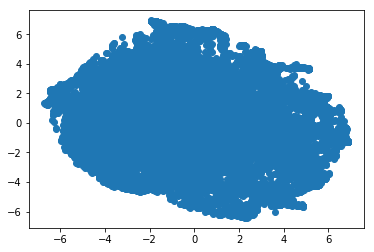

In [7]:
sne_projection = get_sne_projection_values(word_vectors)
plot_sne_visualization(sne_projection, word_vectors)

## The above is a visualization of all the words. Labelling all words created a big clutter of words, so I avoided it.

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.898186
[t-SNE] Error after 300 iterations: 0.438722
t-SNE done! Time elapsed: 0.0843539237976 seconds


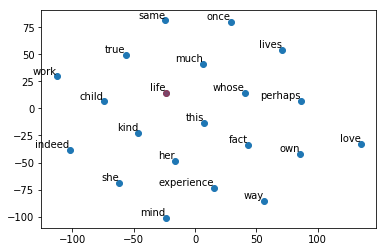

In [8]:
word_dictionary = getWordVectorDict()
similar_words = find_most_similar(word_dictionary, 'life', 21)
similar_word_vectors = [word_dictionary[word]  for word in similar_words]
sne_results = get_sne_projection_values(similar_word_vectors)
plot_sne_visualization(sne_results, similar_words, True)


## The above is a visualization for the neighbors of the word "life". The word is indicated in red color.

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.851311
[t-SNE] Error after 300 iterations: 0.487875
t-SNE done! Time elapsed: 0.0865800380707 seconds


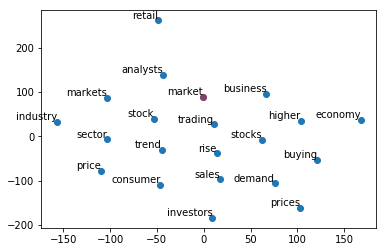

In [9]:
word_dictionary = getWordVectorDict()
similar_words = find_most_similar(word_dictionary, 'market', 21)
similar_word_vectors = [word_dictionary[word]  for word in similar_words]
sne_results = get_sne_projection_values(similar_word_vectors)
plot_sne_visualization(sne_results, similar_words, True)

## The above is a visualization for the neighbors of the word "market". The word is indicated in red color.

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.764080
[t-SNE] Error after 300 iterations: 0.519681
t-SNE done! Time elapsed: 0.0838949680328 seconds


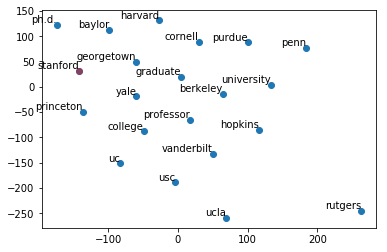

In [10]:
word_dictionary = getWordVectorDict()
similar_words = find_most_similar(word_dictionary, 'stanford', 21)
similar_word_vectors = [word_dictionary[word]  for word in similar_words]
sne_results = get_sne_projection_values(similar_word_vectors)
plot_sne_visualization(sne_results, similar_words, True)

## The above is a visualization for the neighbors of the word "stanford". The word is indicated in red color.

[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.082829
[t-SNE] Error after 300 iterations: 0.428554
t-SNE done! Time elapsed: 0.0858941078186 seconds


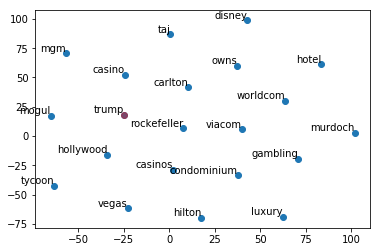

In [11]:
word_dictionary = getWordVectorDict()
similar_words = find_most_similar(word_dictionary, 'trump', 21)
similar_word_vectors = [word_dictionary[word]  for word in similar_words]
sne_results = get_sne_projection_values(similar_word_vectors)
plot_sne_visualization(sne_results, similar_words, True)

## The above is a visualization for the neighbors of the word "trump". The word is indicated in red color.


[t-SNE] Computing 20 nearest neighbors...
[t-SNE] Indexed 21 samples in 0.000s...
[t-SNE] Computed neighbors for 21 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.245308
[t-SNE] Error after 300 iterations: 0.528793
t-SNE done! Time elapsed: 0.0904850959778 seconds


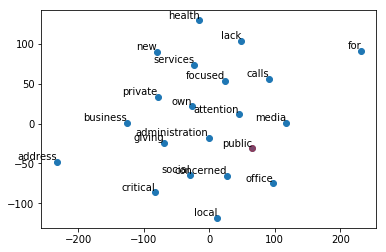

In [12]:
word_dictionary = getWordVectorDict()
similar_words = find_most_similar(word_dictionary, 'public', 21)
similar_word_vectors = [word_dictionary[word]  for word in similar_words]
sne_results = get_sne_projection_values(similar_word_vectors)
plot_sne_visualization(sne_results, similar_words, True)

## The above is a visualization for the neighbors of the word "public". The word is indicated in red color.